In [0]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers

from tensorflow.python.keras import losses
from tensorflow.python.keras import models
import sys
from tensorflow.python.keras import backend as K


In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
from sklearn.utils import shuffle
import random
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
BATCH_SIZE = 16
seed = 1


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls /content/drive/My\ Drive/Nephrectomy\ Endoscopic\ Images/   

desktop.ini  Mask_pat_4  Mask_pat_9		    model.json	Pat_4  Pat_9
Mask_pat_1   Mask_pat_6  model22nd.h5		    Pat_1	Pat_6
Mask_pat_2   Mask_pat_7  model23rd_mixed_data.h5    Pat_2	Pat_7
Mask_pat_3   Mask_pat_8  model23rd_mixed_data.json  Pat_3	Pat_8


In [6]:
!pwd


/content


In [0]:

img_dir = "/content/drive/My Drive/Nephrectomy Endoscopic Images"
label_dir = "/content/drive/My Drive/Nephrectomy Endoscopic Images"

import cv2
temp = []

In [8]:
%cd /content/drive/My Drive/Nephrectomy Endoscopic Images


/content/drive/My Drive/Nephrectomy Endoscopic Images


In [27]:
#moving all directory names i.e Pat_1,Mask_Pat_1 etc. for the training dataset into list called temp
temp = []
for filename in os.listdir("/content/drive/My Drive/Nephrectomy Endoscopic Images"):
     
     if (str(filename.split(".")[0]) == "desktop"):
            continue
     else:
        temp.append(filename)
temp.sort()
temp = temp[0:5] + temp[6:8] + temp[8:-7] + temp[-6:-4]
for item in temp:
  print(item)


Mask_pat_1
Mask_pat_2
Mask_pat_3
Mask_pat_4
Mask_pat_6
Mask_pat_8
Mask_pat_9
Pat_1
Pat_2
Pat_3
Pat_4
Pat_6
Pat_8
Pat_9


In [0]:
tester = []
for filename in os.listdir("/content/drive/My Drive/Nephrectomy Endoscopic Images"):
     
     if (str(filename.split(".")[0]) == "desktop"):
            continue
     else:
        tester.append(filename)

In [29]:
##moving all directory names i.e Pat_7,Mask_Pat_7  for the testing dataset into list called tester
  print(item)
x_test_file = tester[7]
y_test_file = tester[11]
print(x_test_file , y_test_file)

Pat_9
Pat_7 Mask_pat_7


In [0]:
def helper(filename):
  
  return int(filename.split("/")[-1].split("_")[1].split(".")[0])

In [31]:
#extracting all filenames of images and masks for testing set
x_test_filenames = []
y_test_filenames = []
for filename in os.listdir("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + x_test_file ):
       if(str(filename.split(".")[0]) == "desktop"):
        print(filename)
        continue
       else:
        x_test_filenames.append("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + x_test_file + "/" +  filename)
        x_test_filenames.sort(key = helper)
for filenamey in os.listdir("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + y_test_file ):
       if(str(filenamey.split(".")[0]) == "desktop"):
        print(filenamey)
        continue
       else:
        y_test_filenames.append("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + y_test_file + "/" +  filenamey)
        y_test_filenames.sort(key = helper)        

desktop.ini
desktop.ini


In [32]:
len(x_test_filenames)

240

In [0]:
x_train_filenames = []
y_train_filenames = []
temp1 = []
temp2 = []

In [0]:
#extracting all filenames of images and masks for training set.These are moved to x_train_filenames and Y-train filenames and then sorted 
for item in temp:
  for filenamex in os.listdir("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + item ):
      if(str(filenamex.split(".")[0]) == "desktop"):
        
        continue
      else:  
       if(str(item.split("_")[0]) != "Mask"):
          
          
            temp1.append("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + item + "/" +  filenamex)
            temp1.sort(key = helper)
       else: 
          
            temp2.append("/content/drive/My Drive/Nephrectomy Endoscopic Images/" + item + "/" +  filenamex)
            temp2.sort(key = helper)
  #temp1.sort(key = helper)
  #temp2.sort(key = helper)
  x_train_filenames.extend(temp1)
  y_train_filenames.extend(temp2)
  temp1 = []
  temp2 = []

In [35]:
len(x_train_filenames)


1680

In [0]:
i = 0
X = np.zeros((len(x_train_filenames), 200, 200, 3), dtype=np.float32)
y = np.zeros((len(x_train_filenames), 200, 200, 1), dtype=np.float32)

In [0]:
X_test = np.zeros((len(x_test_filenames), 200, 200, 3), dtype=np.float32)
y_test = np.zeros((len(x_test_filenames), 200, 200, 1), dtype=np.float32)

In [0]:
test_data = zip(x_test_filenames,y_test_filenames)
train_data =  zip(x_train_filenames,y_train_filenames)

In [39]:
#Loading images as numpy arrays into X_test and y_test
j = 0
for img,label in test_data :
    img = load_img(img, grayscale= False)
    x_img = img_to_array(img)
    x_img = resize(x_img, (200, 200, 3), mode = 'constant', preserve_range = True)
    # Load masks
    mask = img_to_array(load_img(label, grayscale=True))
    mask = resize(mask, (200, 200, 1), mode = 'constant', preserve_range = True)
    # Save images
    X_test[j] = x_img
    y_test[j] = mask
    j = j+1
print(j)    

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


240


In [40]:
#Loading images as numpy arrays into x_train and y_train
for img,label in train_data :
    img = load_img(img, grayscale= False)
    x_img = img_to_array(img)
    x_img = resize(x_img, (200, 200, 3), mode = 'constant', preserve_range = True)
    # Load masks
    mask = img_to_array(load_img(label, grayscale=True))
    
    
    mask = resize(mask, (200, 200, 1), mode = 'constant', preserve_range = True)
    # Save images
    X[i] = x_img
    y[i] = mask
    i = i+1
print(i)    

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1680


In [0]:
#train val split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
#rescaling all data
X_test = X_test/255.0
y_test = y_test/255.0
X_valid = X_valid/255.0
y_valid = y_valid/255.0
X_train = X_train/255.0
y_train = y_train/255.0

In [0]:
#randomly shuffling training data
X_train , y_train = shuffle(X_train , y_train)

Text(0.5, 1.0, 'Mask')

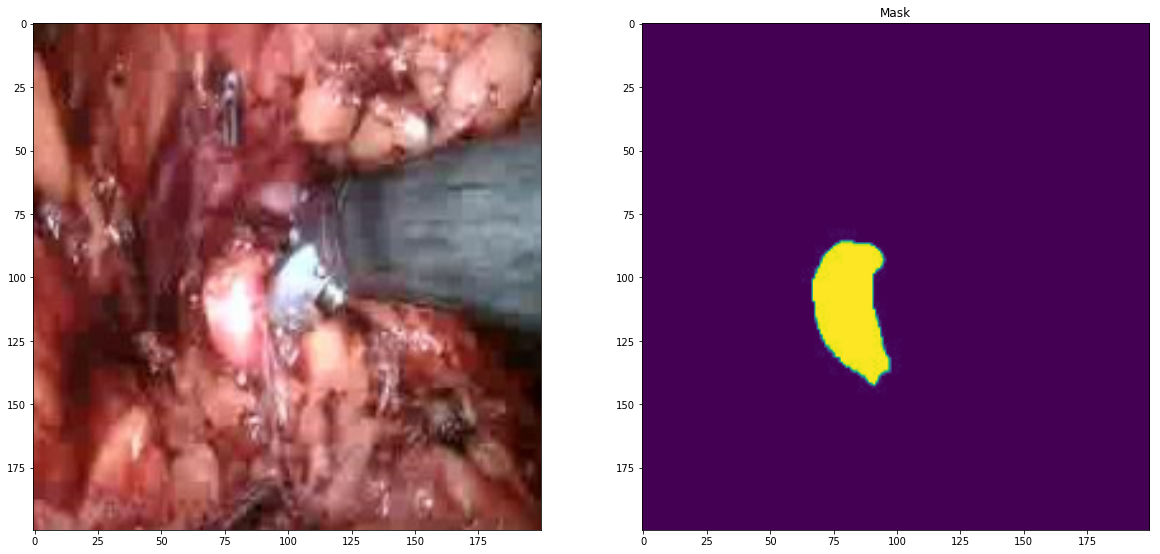

In [44]:
#Visualization
ix = random.randint(0, len(X_test))
has_mask = y_test[ix].max() > 0 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_test[ix], cmap = 'seismic', interpolation = 'bilinear')
#if has_mask: # if salt
    # draw a boundary(contour) in the original image 
   # ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
#ax1.set_title('Image')

ax2.imshow(y_test[ix].squeeze(), cmap = None , interpolation = 'bilinear')
ax2.set_title('Mask')


In [0]:
#Defining image datagenerator for training,validation and testing data and fitting data to generators,
image_datagen = image.ImageDataGenerator(rotation_range = 45)#tal_flip=True)
mask_datagen = image.ImageDataGenerator(rotation_range = 45)#tation_range=45)#width_shift_range=0.2, height_shift_range=0.2)
#Training data is now augmented with a rotation angle of 45 degrees

In [0]:
image_datagen.fit(X_train, augment=False, seed=seed)
mask_datagen.fit(y_train, augment=False, seed=seed)


In [47]:
print(X_valid.shape)


(336, 200, 200, 3)


In [0]:
x=image_datagen.flow(X_train,batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y=mask_datagen.flow(y_train,batch_size=BATCH_SIZE,shuffle=True, seed=seed)



In [0]:
image_datagen_val = image.ImageDataGenerator()
mask_datagen_val = image.ImageDataGenerator()

In [0]:
image_datagen_val.fit(X_valid, augment=False, seed=seed)
mask_datagen_val.fit(y_valid, augment=False, seed=seed)

In [0]:
x_val=image_datagen_val.flow(X_valid,batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_val=mask_datagen_val.flow(y_valid,batch_size=BATCH_SIZE,shuffle=True, seed=seed)

In [0]:
image_datagen_test = image.ImageDataGenerator()
mask_datagen_test = image.ImageDataGenerator()
image_datagen_test.fit(X_test, augment=False, seed=seed)
mask_datagen_test.fit(y_test, augment=False, seed=seed)
x_test=image_datagen_test.flow(X_test,batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_test=mask_datagen_test.flow(y_test,batch_size=BATCH_SIZE,shuffle=True, seed=seed)

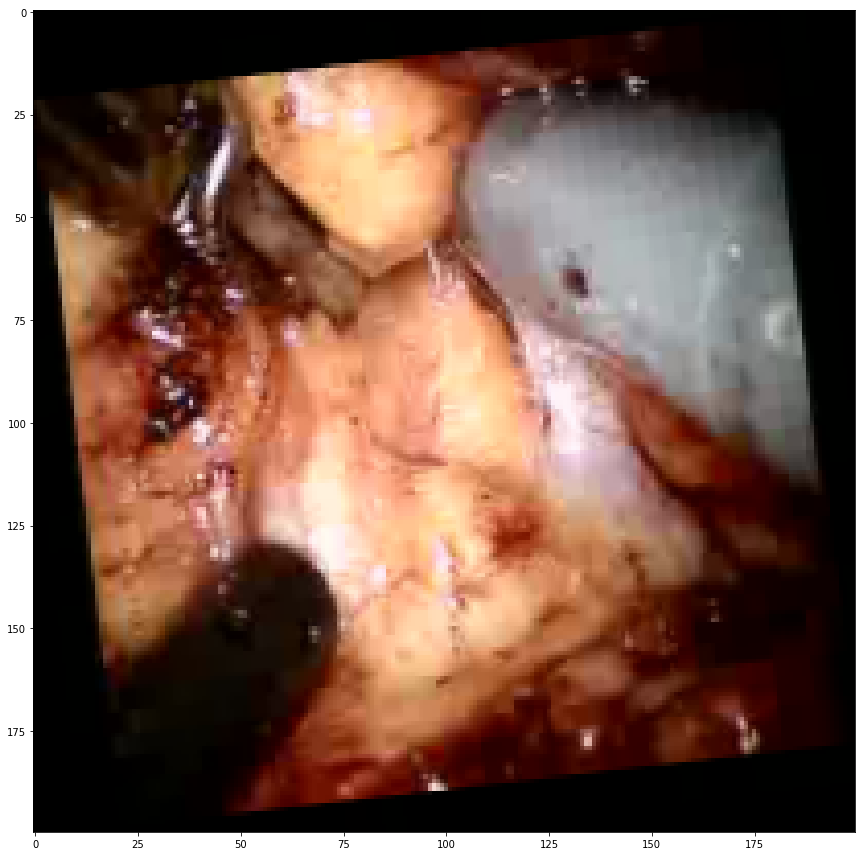

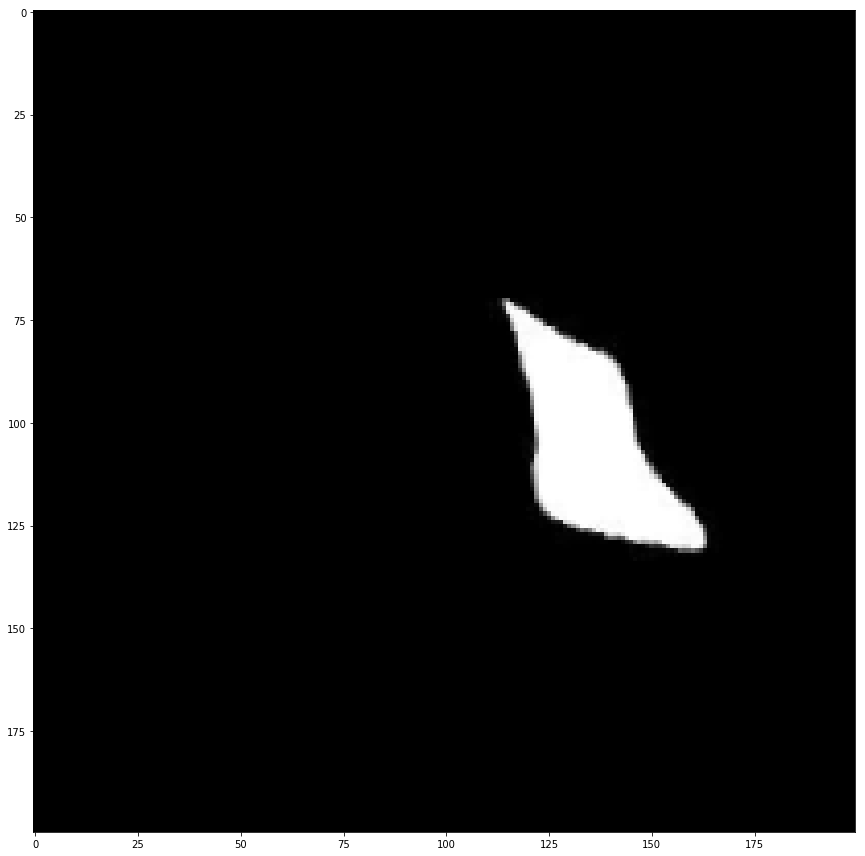

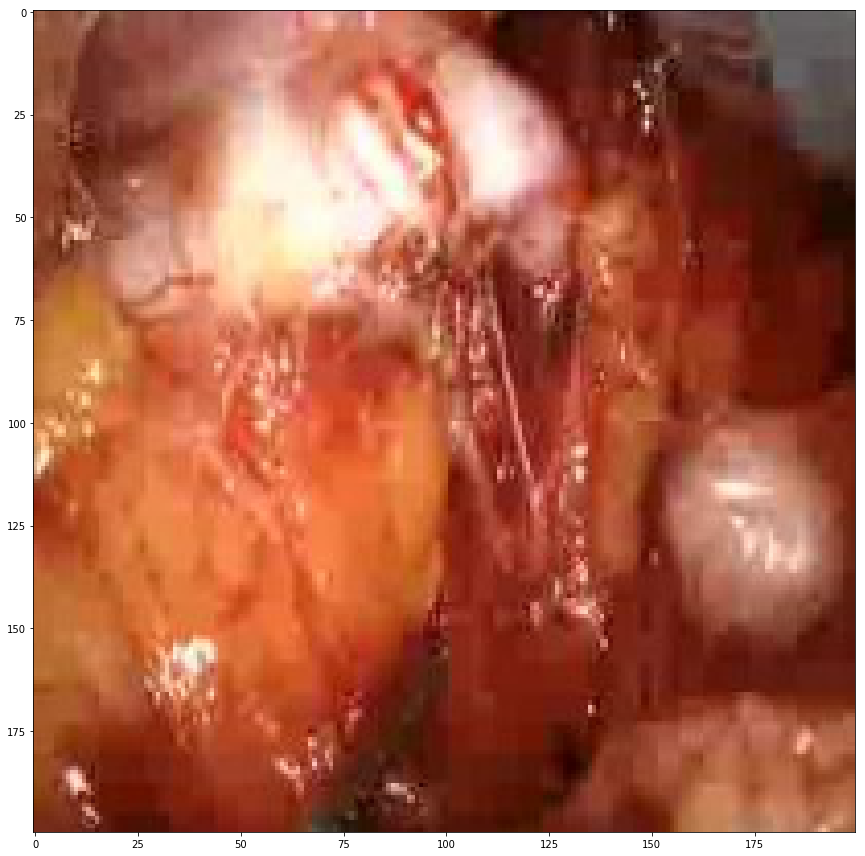

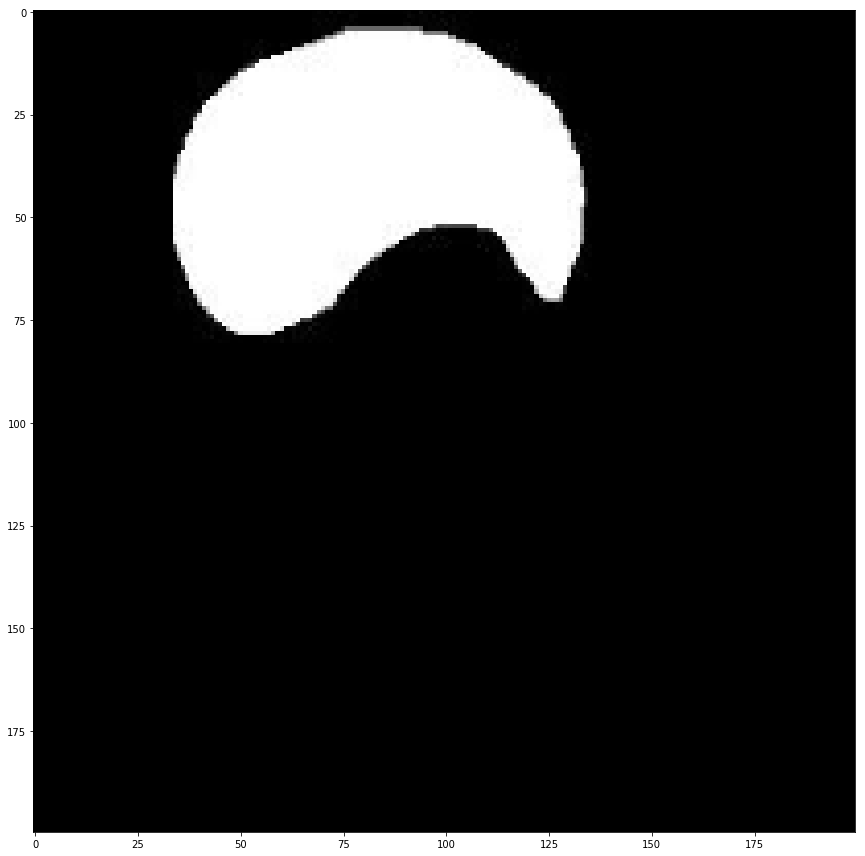

In [53]:
from skimage.io import imread, imshow, imread_collection, concatenate_images
imshow(x.next()[0])
plt.show()
imshow(np.squeeze(y.next()[0]))
plt.show()
imshow(x_val.next()[0])
plt.show()
imshow(np.squeeze(y_val.next()[0]))
plt.show()


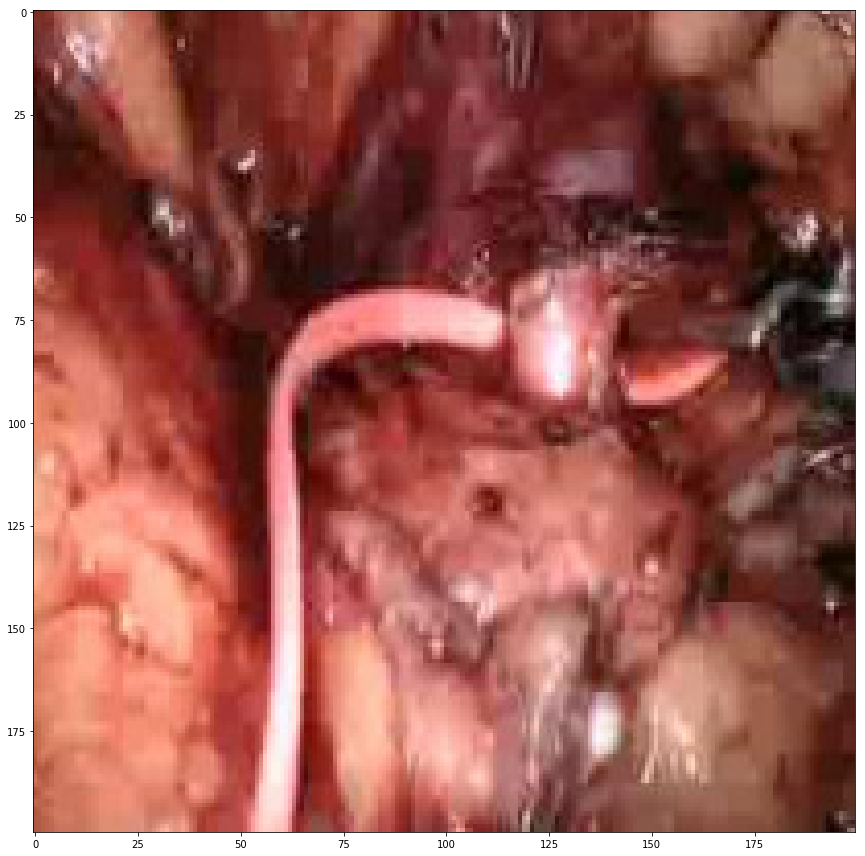

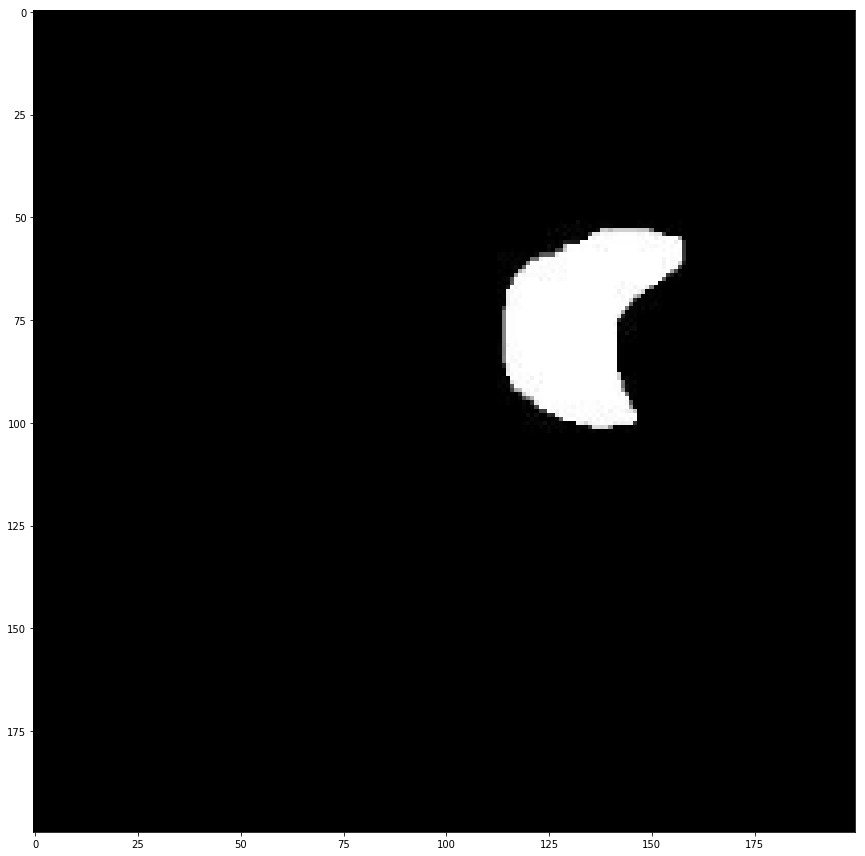

In [54]:
imshow(x_test.next()[0])
plt.show()
imshow(np.squeeze(y_test.next()[0]))
plt.show()

In [0]:
#to combine both image and mask generators
def combine_generator(gen1, gen2):
    while True:
        yield(gen1.next(), gen2.next())   

In [0]:
train_generator = combine_generator(x , y)
val_generator = combine_generator(x_val, y_val)


In [0]:
test_generator = combine_generator(x_test,y_test)

In [0]:
img_shape = (200, 200, 3)
batch_size = 32

epochs = 50

In [0]:
#now making model


def conv(input,num_filters):
  layer1 = layers.Conv2D(num_filters , (3,3) , padding = 'same')(input)
  layer2  = layers.BatchNormalization()(layer1)
  layer3 = layers.Activation('relu')(layer2)
  layer3 = Dropout(0.05)(layer3)
  layer4 = layers.Conv2D(num_filters , (3,3) , padding = 'same')(layer3)
  layer5  = layers.BatchNormalization()(layer4)
  layer6 = layers.Activation('relu')(layer5)
  return layer6

def encoder(input,num_filters):
  x = conv(input,num_filters)
  pool = layers.MaxPooling2D((2,2), strides = (2,2))(x)
  return pool , x


def decoder(input,concat,num_filters):
   x = layers.Conv2DTranspose(num_filters , (2,2) ,strides = (2,2) , padding = 'same')(input)
   x = layers.concatenate([x,concat] , axis = -1)
   x = layers.BatchNormalization()(x)
   decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(x)
   decoder = layers.BatchNormalization()(decoder)
   decoder = layers.Activation('relu')(decoder)
   decoder = Dropout(0.1)(decoder)
   decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
   decoder = layers.BatchNormalization()(decoder)
   decoder = layers.Activation('relu')(decoder)
   return decoder 
  
  
  
  

In [0]:
from tensorflow.python.keras.layers import Dropout, Lambda



In [61]:

inputs  = layers.Input(shape = img_shape)
#inputs = Lambda(lambda x: x / 255) (inputs)

#enp1 , en1 = encoder(inputs , 32)
enp2 , en2 = encoder(inputs , 64)
enp3 , en3 = encoder(enp2 , 128)
#enp4 , en4 = encoder(enp3 , 256)
#enp5 , en5 = encoder(enp4 , 512)
center = conv(enp3 , 256)

#decoder4 = decoder(center, en4, 256)
decoder3 = decoder(center, en3,128)
# 32
decoder2 = decoder(decoder3, en2, 64)
# 64
#decoder1 = decoder(decoder2, en2, 64)
# 128
#decoder0 = decoder(decoder1, en1, 32)
outputs = layers.Conv2D(1 ,(1,1) , activation = 'sigmoid')(decoder2)




W0724 22:12:31.369149 139678568175488 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model = models.Model(inputs = [inputs] , outputs = [outputs])


In [0]:

def sp(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [0]:
def sn(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Sensitivity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    tp = K.sum(y_true * y_pred)
    fn = K.sum(y_true * neg_y_pred )
    sensitivity = tp / (tp + fn + K.epsilon())
    return sensitivity

In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
#returns DSC    

In [0]:

def dice_loss(y_true,y_pred):
  loss = 1 - dice_coeff(y_true,y_pred)
  return loss

In [0]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + tf.math.log(dice_loss(y_true, y_pred))
    return loss

In [68]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = [dice_coeff, 'acc' , sp , sn])
model.summary()

W0724 22:12:32.678205 139678568175488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 200, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 200, 200, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [0]:
#%tensorboard --logdir logs

In [70]:
save_model_path = '/tmp/weights23.hdf5'
#earlystopper = tf.keras.callbacks.EarlyStopping(patience=8, verbose=1)
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit_generator(train_generator, 
                   steps_per_epoch= 100,
                   epochs=50,
                   validation_data=val_generator,
                   validation_steps= 20,
                    callbacks=[cp])# , #earlystopper])#,tensorboard_callback])

Epoch 1/50
 99/100 [============================>.] - ETA: 0s - loss: 0.1889 - dice_coeff: 0.1712 - acc: 0.9250 - sp: 0.8929 - sn: 0.2740
Epoch 00001: val_loss improved from inf to 0.31593, saving model to /tmp/weights23.hdf5
100/100 [==============================] - 61s 615ms/step - loss: 0.1883 - dice_coeff: 0.1731 - acc: 0.9251 - sp: 0.8935 - sn: 0.2750 - val_loss: 0.3159 - val_dice_coeff: 0.1346 - val_acc: 0.8439 - val_sp: 0.7859 - val_sn: 0.3993
Epoch 2/50
 99/100 [============================>.] - ETA: 0s - loss: 0.0941 - dice_coeff: 0.4208 - acc: 0.9448 - sp: 0.9616 - sn: 0.4939
Epoch 00002: val_loss improved from 0.31593 to 0.15460, saving model to /tmp/weights23.hdf5
100/100 [==============================] - 51s 511ms/step - loss: 0.0939 - dice_coeff: 0.4222 - acc: 0.9448 - sp: 0.9617 - sn: 0.4952 - val_loss: 0.1546 - val_dice_coeff: 0.1266 - val_acc: 0.9410 - val_sp: 0.9571 - val_sn: 0.1322
Epoch 3/50
 99/100 [============================>.] - ETA: 0s - loss: 0.0555 - dice_

KeyboardInterrupt: ignored

In [71]:
model.evaluate_generator(test_generator,steps =  15,workers = 1,verbose=1)

15/15 [==============================] - 2s 133ms/step - loss: 0.2647 - dice_coeff: 0.0807 - acc: 0.9336 - sp: 0.9753 - sn: 0.0745


[0.26466763814290367, 0.08073814, 0.93356645, 0.9753421, 0.074504495]

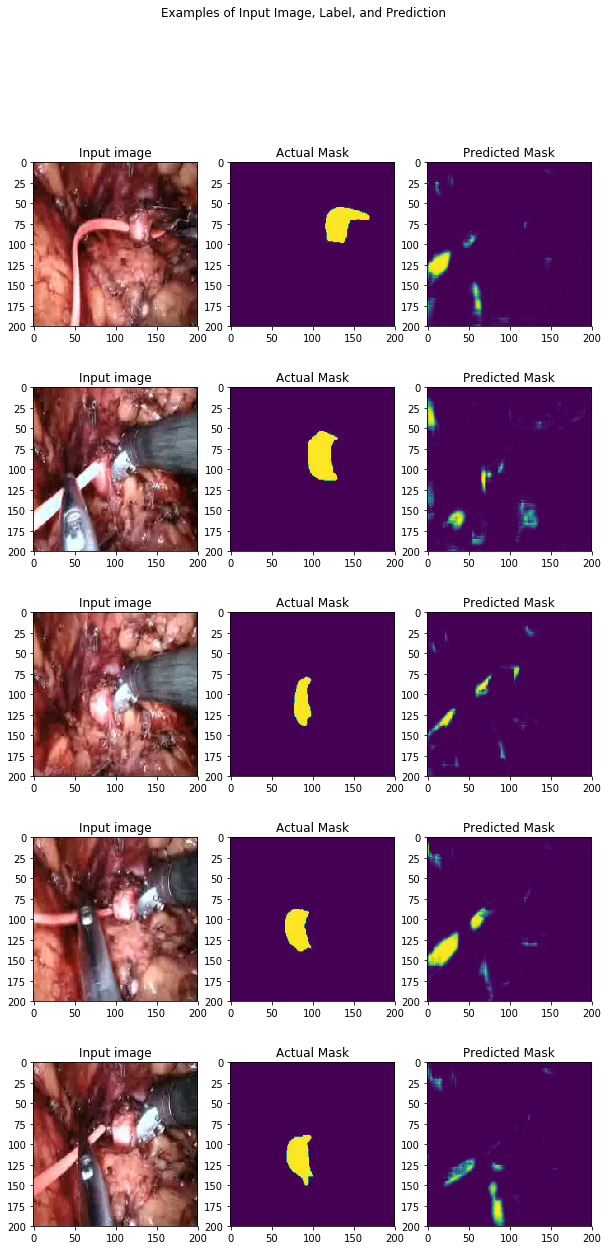

In [72]:





#data_aug_iter = test_ds.make_one_shot_iterator()
#ext_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
  #batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = x_test.next()[0]
  label = y_test.next()[0]
  predicted_label = model.predict(x_test.next())[0]

  plt.subplot(5, 3, 3 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 3, 3 * i + 2)
  plt.imshow(label[ :, :, 0])
  plt.title("Actual Mask")
  plt.subplot(5, 3, 3 * i + 3)
  plt.imshow(predicted_label[:, :, 0])
  plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

In [73]:
model_json = model.to_json()
with open("model23rd_unmixed.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model23rd_unmixed.h5")
print("Saved model to disk")

Saved model to disk
